### Student Information
朝陽科技大學 cyut

Name:許釗維

Student ID:10914901

GitHub ID:morrishsu0821

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

### >>> **First. Take home exercise:** 

In [19]:
### Begin Assignment Here

# Data Preparation
import pandas as pd
import helpers.data_mining_helpers as dmh
from sklearn.datasets import fetch_20newsgroups

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [20]:
# Exercise 2 (take home)

# Answer here
# using loc (by callable)
# where category are 2
X.loc[lambda df: df['category'] == 2,:]

# get all text and category_name column
X.loc[:, lambda df: ['text', 'category_name']]

# using iloc (by callable)
# by column index 1
X.iloc[:, lambda df: [0, 1]]
# by column index 2
X[lambda df: df.columns[0]]

# Series
X['category'].loc[lambda s: s > 1]

2       3
3       3
4       3
5       3
6       3
       ..
2252    2
2253    2
2254    2
2255    2
2256    2
Name: category, Length: 1193, dtype: int64

In [21]:
# Exercise 5 (take home)
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df
NA_df['missing_example'].isnull()

# Answer here
NA_df.isnull().apply(lambda x: dmh.check_missing_values(x))
NA_df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)
# the data about missing_example has one missing and two is not a string type

0    (The amoung of missing records is: , 1)
1    (The amoung of missing records is: , 1)
2    (The amoung of missing records is: , 0)
3    (The amoung of missing records is: , 0)
4    (The amoung of missing records is: , 1)
5    (The amoung of missing records is: , 0)
dtype: object

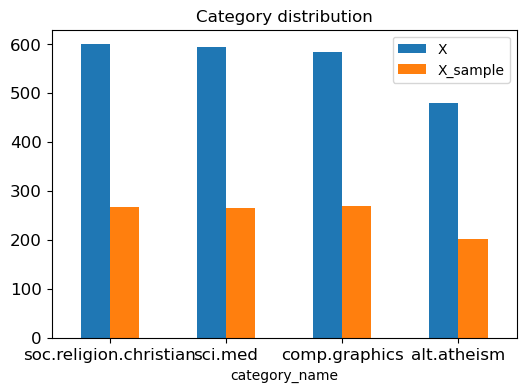

In [22]:
# Exercise 8 (take home)
import matplotlib.pyplot as plt
%matplotlib inline

X_sample = X.sample(n=1000) #random state

# Answer here
# merge
df = pd.DataFrame({
    'X': X.category_name.value_counts(),
    'X_sample': X_sample.category_name.value_counts()
})

df.sort_index(ascending=False).plot(kind='bar', 
                                    title='Category distribution', 
                                    figsize=(6, 4), rot=0, fontsize=12)
plt.legend(loc='upper right')
plt.show()

In [23]:
# Exercise 10 (take home)
import nltk
from sklearn.feature_extraction.text import CountVectorizer

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

analyze = count_vect.build_analyzer()
X_counts.shape

# Answer here
fifth_row = X.text[4]
second_index = np.where(X_counts[0:5, 0:100].toarray()[4] == 1)[0][1]
analyze(fifth_row)[second_index]

'56'